# Assignment 1 The Mandelbrot set


The Mandelbrot set is a 2D set for wicht the function is $$F_c(z)=z^2+c$$. It does not diverge to infinity when iterated starting at $z=0$, for complex numbers $c$. When we have $z_0$ as the first number, we then find $z_1=f_c(z_0)$, $z_2=f_c(z_1),...,z_n=f_c(z_{n-1})$, we can rewrite this as $$z_{n+1}=z_n^2 +c.$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import getpass
current_user = getpass.getuser()
print(current_user)
if current_user == 'mael':
    import scienceplots
    plt.style.use(['science','no-latex'])
from libraries.mandelbrot_funcs import *
from libraries.sampling_methods import *

mael


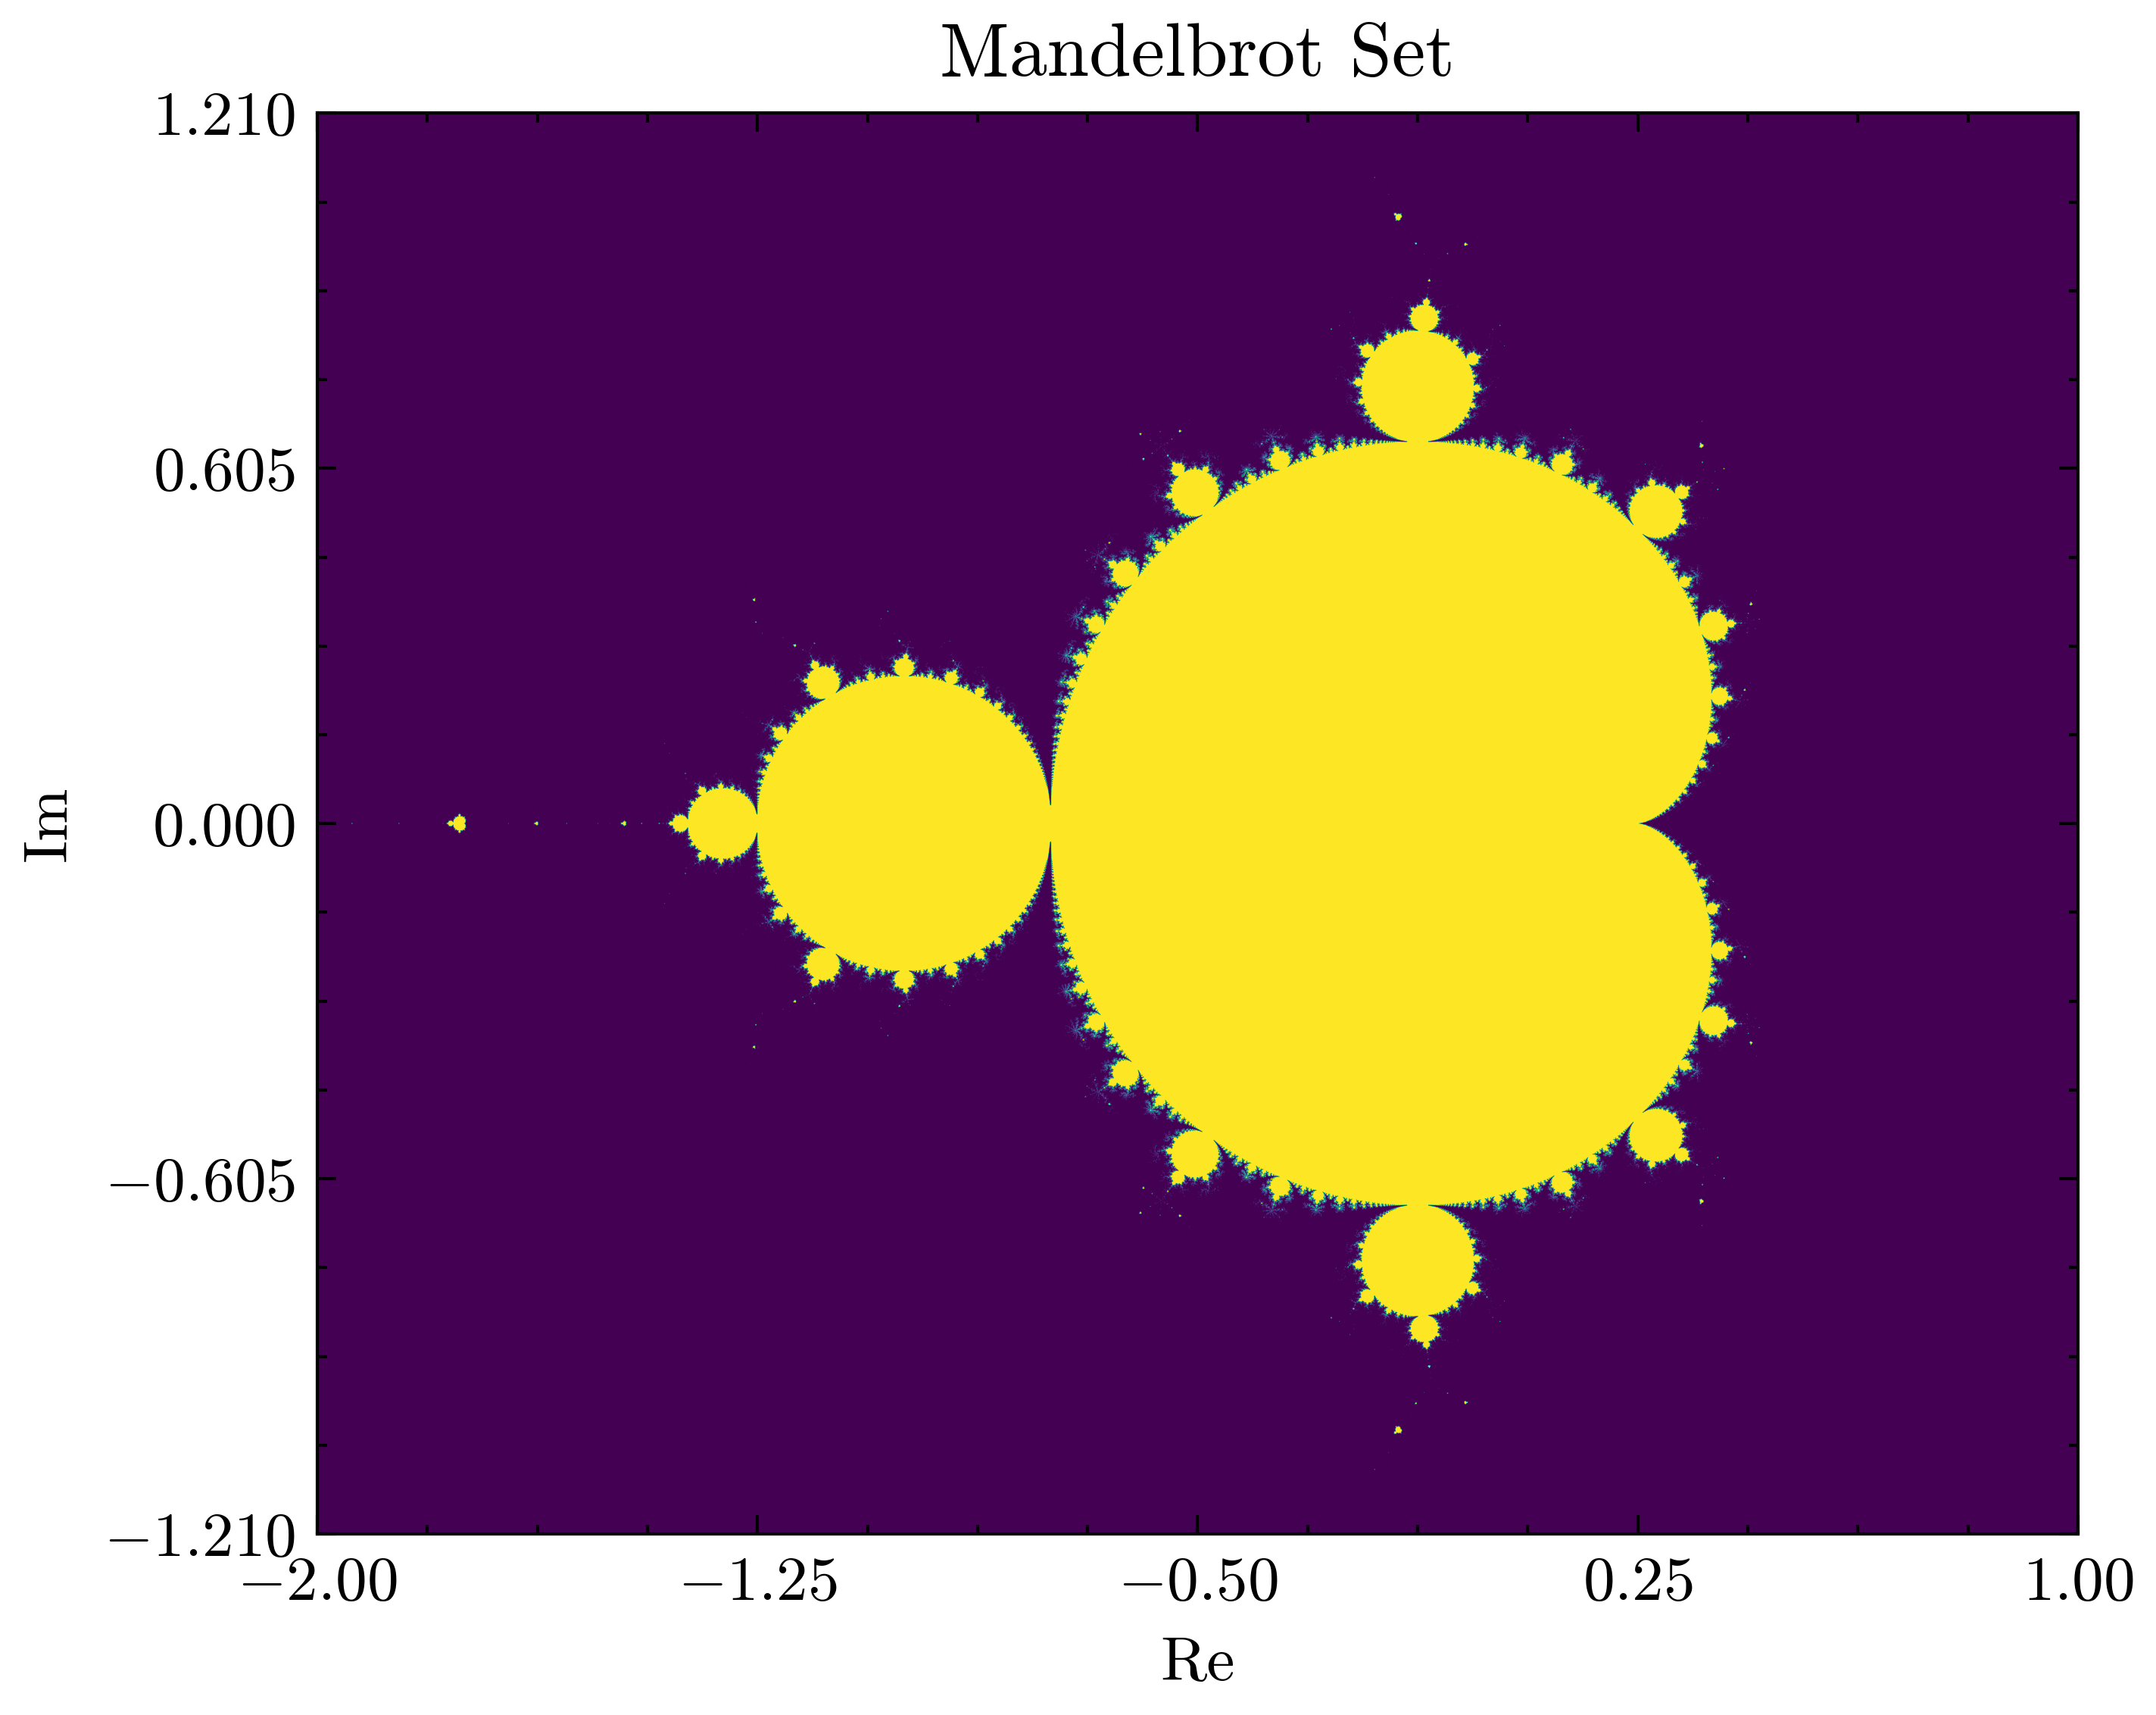

In [4]:
plot_mandelbrot_set(-2, 1, -1.21, 1.21, 10000, 10000, 256)

# 2. Variation in number of iterations

Below we will show how varying the number of mandelbrot iterations will affect the value for the calculated area, we will start by first exploring what sample size is needed to reduce the variance of the area approximation, and then we look at how the number of iterations affects the precision of the surface approximation

Below we calculate the area of the mandelbrot set using 400000 random samples. We then plot a histogram to check whether the distribution is as expected, a normal distribution. The below is done for 50 area calculations using a random uniform number generator.

In [55]:
area_list = []
mandel = MandelbrotSetMC()
for _ in range(50):
    area_list.append(mandel.area_mandelbrot(s_samples = 400000,i_iterations=256))


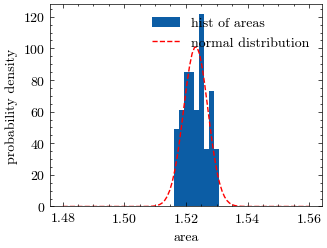

(1.5232066740799999, 0.003942053421411103, 0.625)

In [56]:
# Plotting the histogram of the areas
plt.hist(area_list,bins=9,density=True,label='hist of areas')
# Plotting the normal distribution
s = np.std(area_list)
mu = np.mean(area_list)
normal_distri_func = lambda x: 1/(s*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*s**2))
x = np.linspace(1.48,1.56,100)
plt.plot(x,normal_distri_func(x),'r--',label='normal distribution')
plt.xlabel('area')
plt.ylabel('probability density')
plt.legend()
plt.show()
mu, s, 400000/(8000*8000)*100

We are going to plot the mean of the area+std for the sample sizes: 5e5, 1e6, 2e6, 4e6:

In [44]:
num_samples = 10
num_runs = 50
areas = np.zeros((num_samples,num_runs))
sample_sizes = np.logspace(2.3,7.3,num_samples)
mandel = MandelbrotSetMC()
for i, sample_size in enumerate(sample_sizes):
    for j in range(num_runs):
        areas[i,j]= mandel.area_mandelbrot(s_samples = int(sample_size),i_iterations=128)



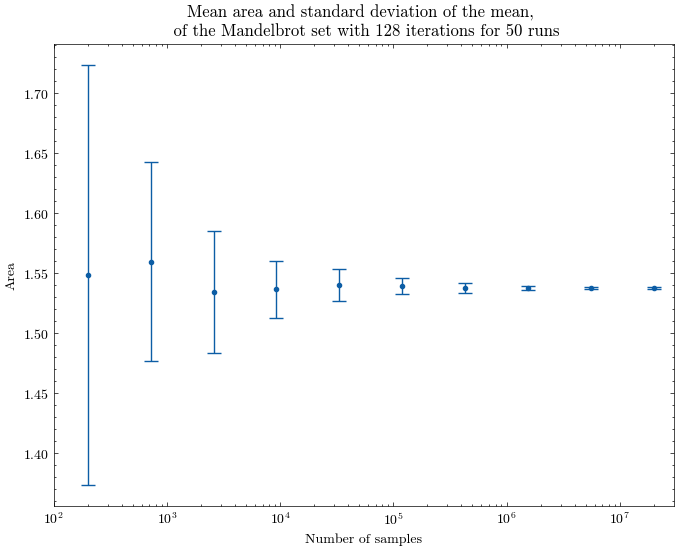

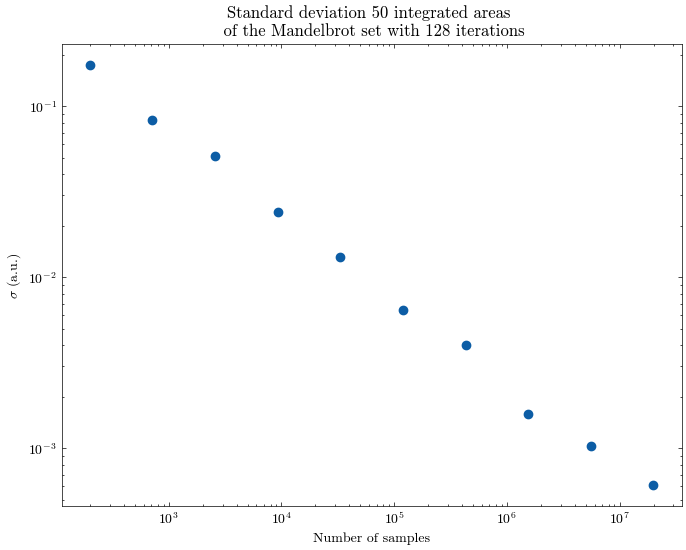

In [61]:
standard_deviation = np.std(areas,axis=1)
mean = np.mean(areas,axis=1)
plt.figure(figsize=(8,6))
plt.title('Mean area and standard deviation of the mean, \n of the Mandelbrot set with 128 iterations for 50 runs')
plt.xlabel('Number of samples')
plt.ylabel('Area')
plt.xscale('log')  
plt.xlim(10**2.3-100,10**7.3+10000000)
plt.errorbar(sample_sizes, mean, yerr=standard_deviation, fmt='.', label='area of mandelbrot set',capsize=5)
plt.show()

plt.figure(figsize=(8,6))
plt.title('Standard deviation 50 integrated areas \n of the Mandelbrot set with 128 iterations')
plt.ylabel(r'$\sigma$ (a.u.) ')
plt.xlabel('Number of samples')
plt.plot(sample_sizes,standard_deviation,'o')
plt.yscale('log')
plt.xscale('log')

In [35]:
# Plotting the area of the mandelbrot set as a function of the number of iterations
area_list = []
mandel = MandelbrotSetMC()
iterations = np.logspace(1,9,num=100,endpoint=True,base=2)
for i_iterations in iterations:
    area_list.append(mandel.area_mandelbrot(s_samples=int(1e7),i_iterations=i_iterations))



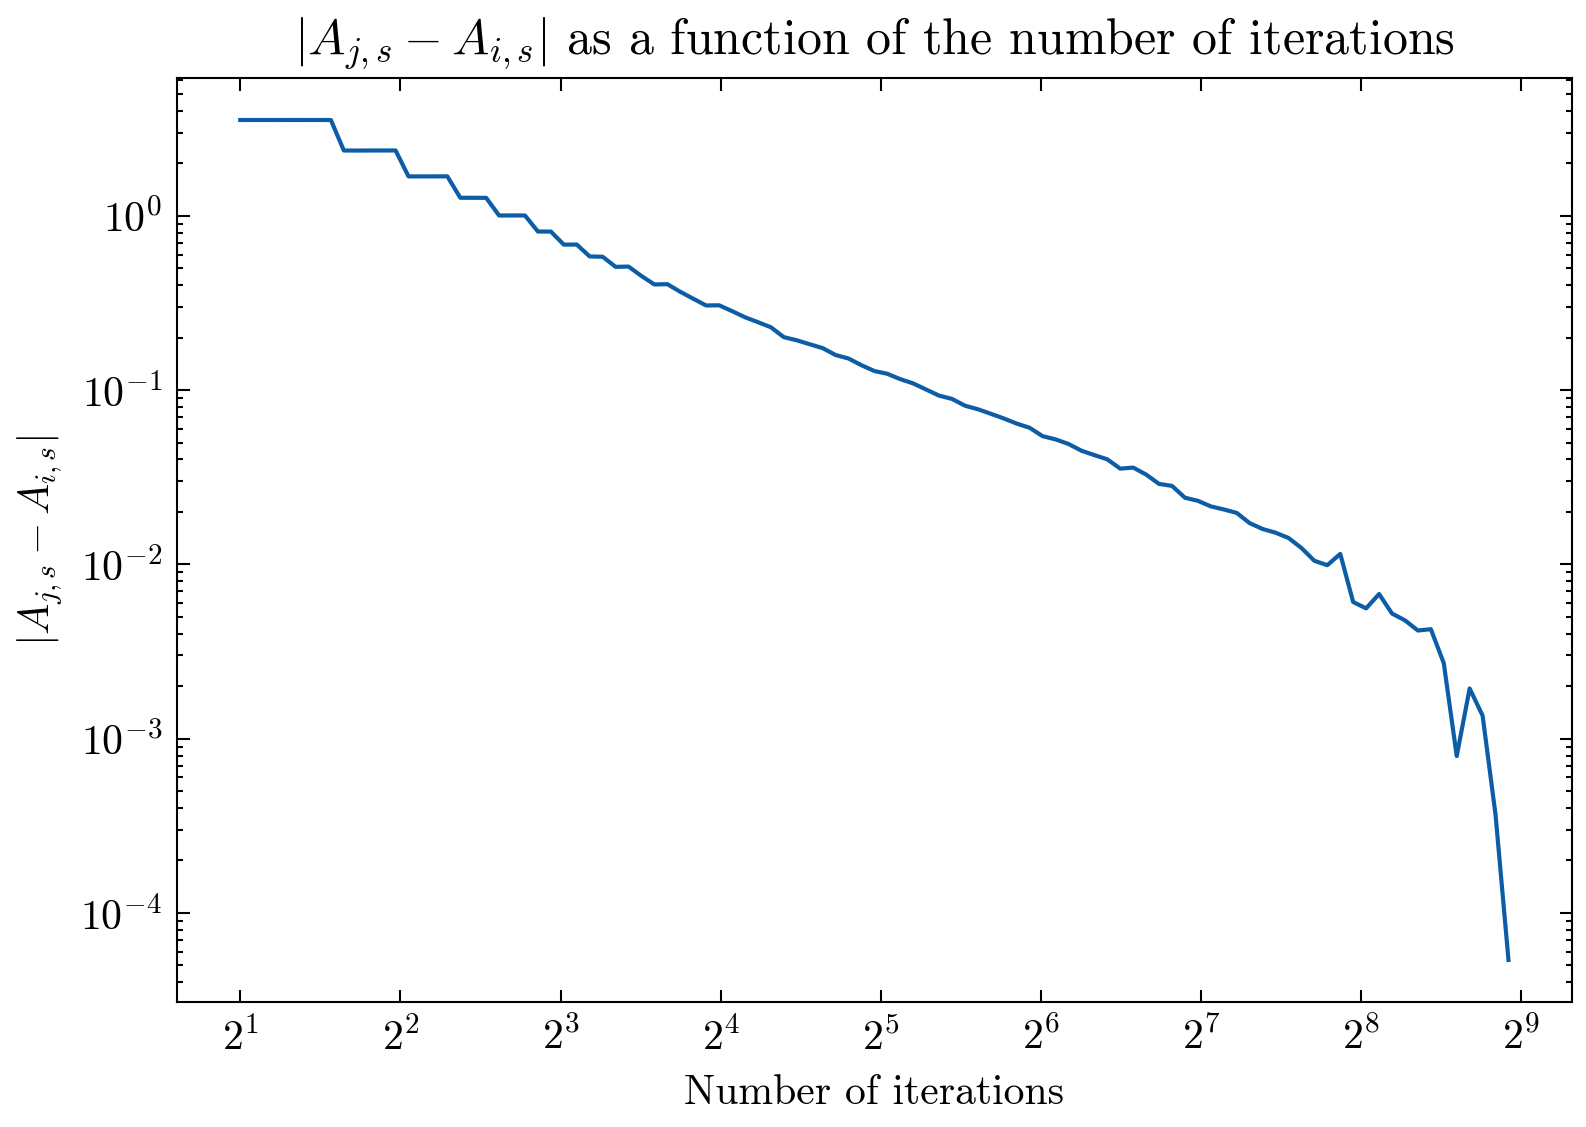

In [50]:
plt.figure(figsize=(6,4),dpi=300)
plt.title(r'$|A_{j,s}-A_{i,s}|$ as a function of the number of iterations')
plt.plot(iterations[:-1],np.array(area_list[:-1])-area_list[-1])
plt.xscale('log', base=2)  # Set xscale to base log 2
plt.yscale('log')
plt.ylabel(r'$|A_{j,s}-A_{i,s}|$')
plt.xlabel('Number of iterations')
plt.show()

# 3. Compare the quality of the results obtained from different sampling methods
For this question we compare the performance of 3 different sampling methods:
1. Pure random sampling
2. Latin hypercube sampling
3. Orthogonal sampling

Look at the different sizes of area for each sampling method:

In [52]:


mandel1 = MandelbrotSetMC(8000,8000)
area1 = mandel1.area_mandelbrot(2000,256)
print(f'the area of the mandelbrot set using Pure Random Sampling is {area1:.4f}')


area2 = mandel1.area_mandelbrot(2000,256,sampling='LHS')
print(f'the area of the mandelbrot set using LHS is {area2:.4f}')

area3 = mandel1.area_mandelbrot(2000,256,sampling='ORT')
print(f'the area of the mandelbrot set using Orth Sampling is {area3:.4f}')

mandel4 = MandelbrotSetMCBias(8000,8000)
area4 = mandel4.area_mandelbrot(2000,256)
print(f'the area of the mandelbrot set using Pure Random Sampling with bias is {area3:.4f}')



the area of the mandelbrot set using Pure Random Sampling is 1.4717
the area of the mandelbrot set using LHS is 1.5105
the area of the mandelbrot set using Orth Sampling is 1.5132
the area of the mandelbrot set using Pure Random Sampling with bias is 1.5132


In [53]:
i = 256
samples = [100, 500, 1000, 5000,7000] 
rep = 200

mc = MandelbrotSetMC()
bias = MandelbrotSetMCBias()

def run_experiment(method, i, s, rep,sampling=False):
    areas = []
    
    for _ in range(rep):
        if sampling:
            area = method.area_mandelbrot(s, i, sampling=sampling)
        else:
            area = method.area_mandelbrot(s,i)
        areas.append(area)
    return np.mean(areas), np.var(areas)

In [54]:
results = {}
for s in samples:
    results[(i, s, 'MC')] = run_experiment(mc, i, s, rep,sampling='PR')
    results[(i, s, 'LHS')] = run_experiment(mc, i, s, rep,sampling = "LHS")
    results[(i, s, 'ORT')] = run_experiment(mc, i, s, rep, sampling = "ORT")
    results[(i, s, 'BIAS')] = run_experiment(bias, i, s, rep)

In [7]:
def statistics(results, method):
    means = []
    variances = []
    for s in samples:
        mean_area, variance = results[(i,s, method)]
        means.append(mean_area)
        variances.append(variance)
    avg_mean =np.mean(means)
    avg_variance =np.mean(variances)
    stdv = np.sqrt(avg_variance)
    return avg_mean, avg_variance, stdv


avg_mean_mc, avg_variance_mc, std_dev_mc = statistics(results, 'MC')
avg_mean_lhs, avg_variance_lhs, std_dev_lhs =statistics(results, 'LHS')
avg_mean_ort, avg_variance_ort, std_dev_ort = statistics(results, 'ORT')
avg_mean_bias, avg_variance_bias, std_dev_bias = statistics(results, 'BIAS')
print("Pure Random Sampling:")
print(f"Average Mean Area: {avg_mean_mc}, Average Variance: {avg_variance_mc}, Standard Deviation: {std_dev_mc}")
print("\nLatin Hypercube Sampling Method:")
print(f"Average Mean Area: {avg_mean_lhs}, Average Variance: {avg_variance_lhs}, Standard Deviation: {std_dev_lhs}")
print("\nOrthogonal Sampling Method:")
print(f"Average Mean Area: {avg_mean_ort}, Average Variance: {avg_variance_ort}, Standard Deviation: {std_dev_ort}")
print("\nPure Random Sampling with bias:")
print(f"Average Mean Area: {avg_mean_bias}, Average Variance: {avg_variance_bias}, Standard Deviation: {std_dev_bias}")

Pure Random Sampling:
Average Mean Area: 1.5245401183999998, Average Variance: 0.0170317990798399, Standard Deviation: 0.13050593503684

Latin Hypercube Sampling Method:
Average Mean Area: 1.5214415923199998, Average Variance: 0.007272697470931797, Standard Deviation: 0.08528011181355122

Orthogonal Sampling Method:
Average Mean Area: 1.5194586368, Average Variance: 0.017442173881408306, Standard Deviation: 0.13206882251844418

Pure Random Sampling with bias:
Average Mean Area: 5.01957288768, Average Variance: 0.011926443073024883, Standard Deviation: 0.1092082555168101


In [8]:
def plot_results(results,name, color):
    res = {key[:2]: value for key, value in results.items() if key[2] == name}
    iterations = sorted(set(i for i, s in res))
    samples =sorted(set(s for i,s in res))
    
    for i in iterations:
        mean_areas = [res[(i,s)][0] for s in samples]
        variances = [res[(i,s)][1] for s in samples]
        
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(samples, mean_areas, label=f'Iterations={i}', color=color)
        plt.xlabel('Samples')
        plt.ylabel('Mean Area')
        plt.title(f'Mean Area vs. Samples for {name}')
        plt.legend()
        plt.subplot(1, 2,2)
        plt.plot(samples, variances, label=f'Iterations={i}', color=color)
        plt.yscale('log')
        plt.xlabel('Samples')
        plt.ylabel('Variance')
        plt.title(f'Variance vs. Samples for {name}')
        plt.legend()

    plt.show()

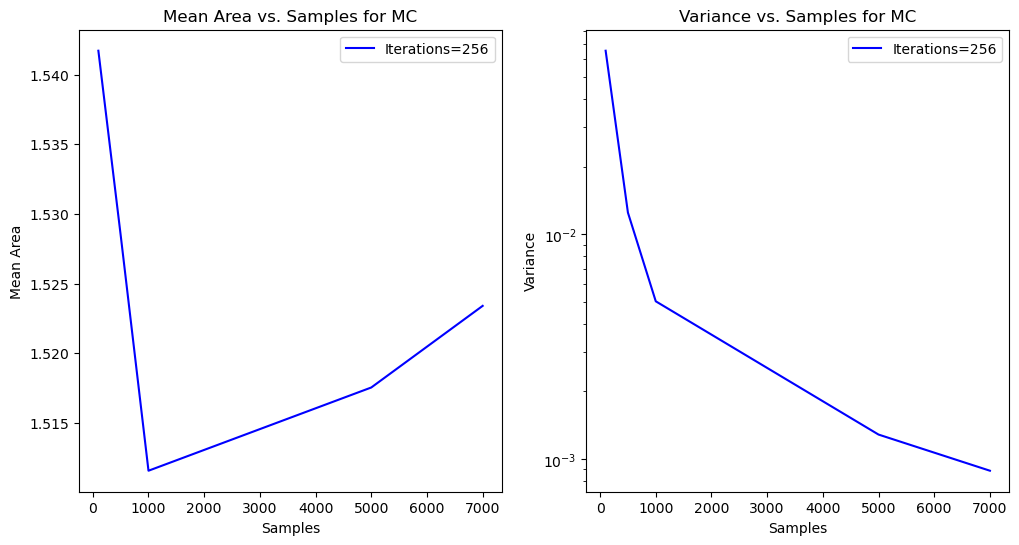

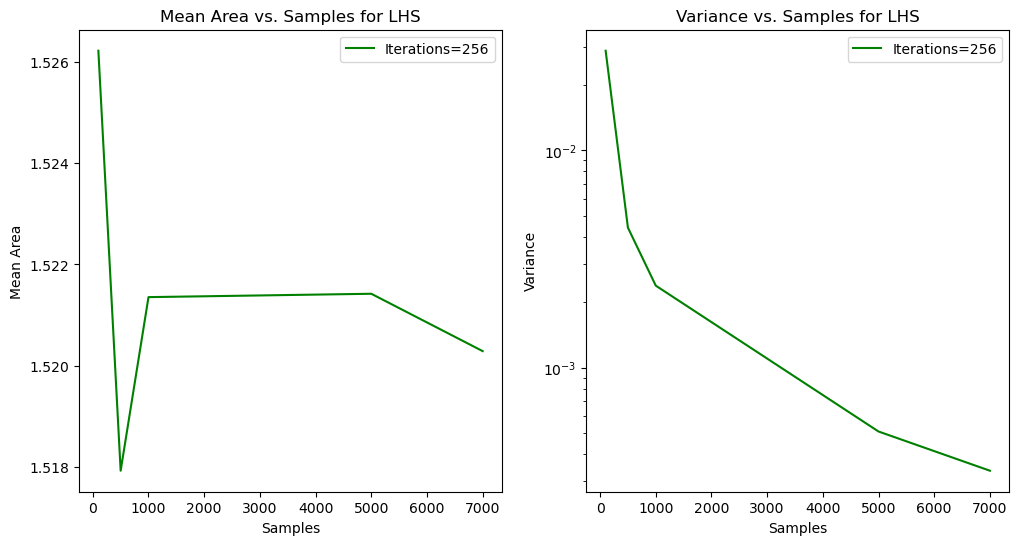

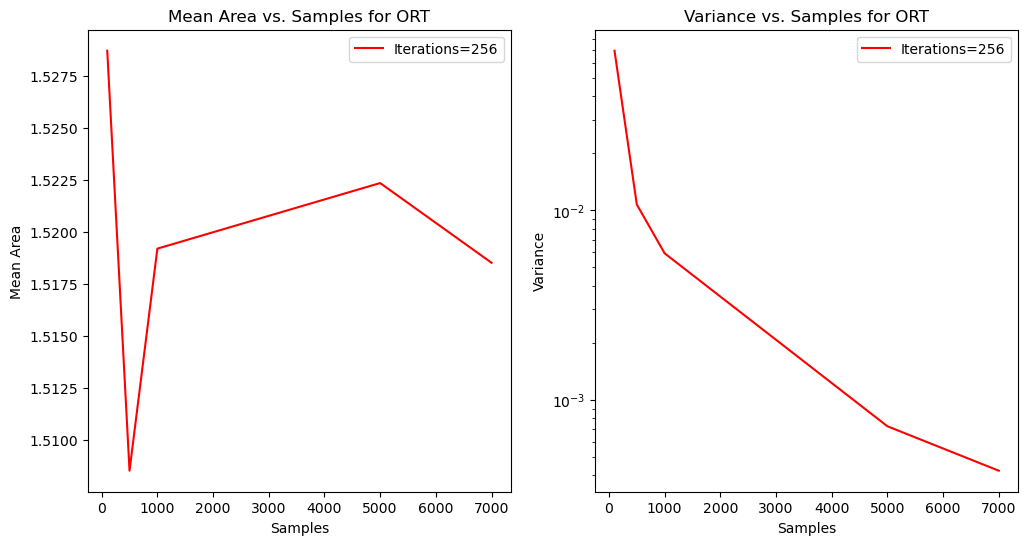

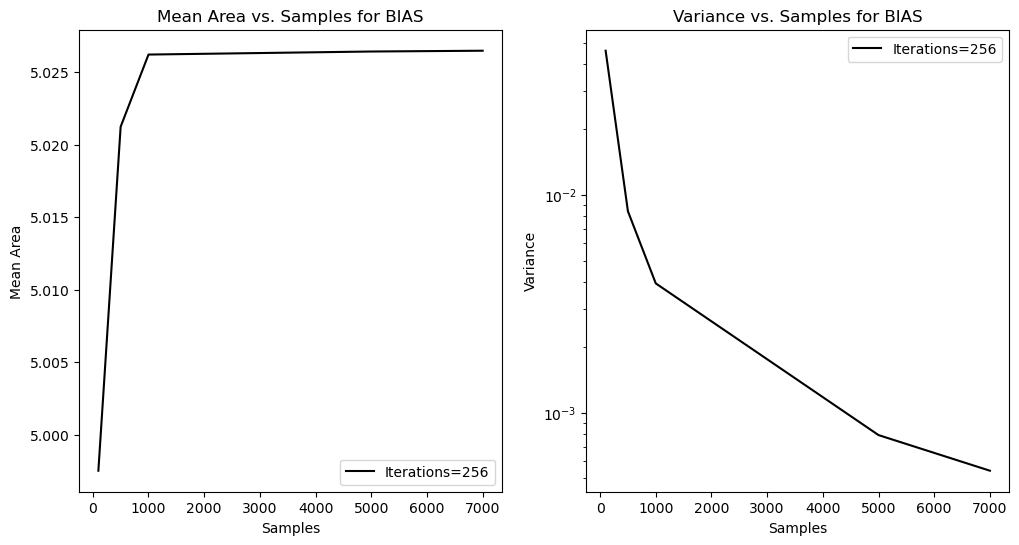

In [9]:
plot_results(results, 'MC', 'blue')
plot_results(results, 'LHS', 'green')
plot_results(results, 'ORT', 'red')
plot_results(results, 'BIAS', 'black')